# Support Vector Machines

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=50 , centers = 2 , random_state=0 , cluster_std=0.6)

In [3]:
print(X)
print(y)

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

In [4]:
import matplotlib.pyplot as plt

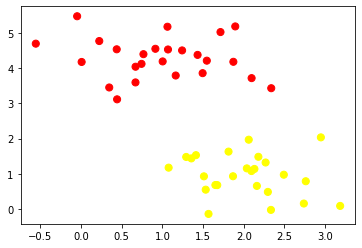

In [5]:
plt.scatter(X[:,0] , X[:,1] , c = y, s = 50 , cmap ='autumn'); # We see that linear SVM can do this.

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC(kernel = 'linear' , C = 1E10)

In [8]:
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
from sklearn.datasets import make_circles # When we can't do linear model. Lets see how SVM works.

In [10]:
X,y = make_circles(100, factor =.1 , noise = .1)

In [11]:
clf = SVC(kernel="linear").fit(X,y)

In [12]:
clf = SVC(kernel="rbf" , C = 1E6 , gamma = 'auto').fit(X,y) # Radial basis function --> rbf. Its work with not linear datasets.

In [13]:
X,y = make_blobs(n_samples=100 , centers = 2 , random_state=0 , cluster_std=1.2)

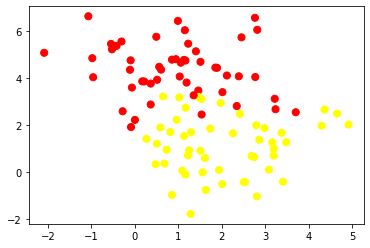

In [14]:
plt.scatter(X[:,0] , X[:,1] , c = y, s = 50 , cmap ='autumn'); # Its very hard dataset. 

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
cancer = load_breast_cancer()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state=0)

In [19]:
svc = SVC(gamma='auto').fit(X_train , y_train)

In [20]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))  # Train = 1.0 , test = 0.63 . There is too much overfit.

1.0
0.6293706293706294


In [21]:
min_on_trainin = X_train.min(axis=0)

In [22]:
range_on_training = (X_train - min_on_trainin).max(axis=0)

In [23]:
X_train_scaled = (X_train - min_on_trainin) / range_on_training
X_test_scaled = (X_test - min_on_trainin) / range_on_training

In [24]:
svc = SVC(gamma='auto').fit(X_train_scaled , y_train)

In [25]:
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test)) # Now train and test scores near but now there is some underfitting.

0.9483568075117371
0.951048951048951


In [31]:
svc = SVC(C = 1000 , gamma='auto').fit(X_train_scaled , y_train) # With kernel, SVM too strong.
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

0.9882629107981221
0.972027972027972
